In [11]:
#Q1
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [12]:
california_housing = fetch_california_housing()

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['Price'] = california_housing.target  # Add target as 'Price'
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [13]:
# Step 2: Select a single feature for Simple Linear Regression (e.g., 'MedInc' - Median Income)
X = df[['MedInc']]  # Feature: Median income
y = df['Price']  # Target: House price

In [14]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Step 4: Create a Simple Linear Regression model
model = LinearRegression()

In [16]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Step 5: Make predictions
y_pred = model.predict(X_test)

In [18]:
# Step 6: Evaluate the model
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: 0.4445972916907883
Coefficient: [0.41933849]


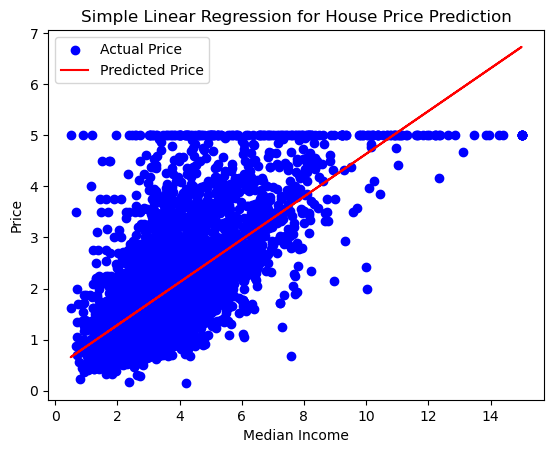

In [19]:
# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', label='Predicted Price')
plt.title('Simple Linear Regression for House Price Prediction')
plt.xlabel('Median Income')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
#Q2
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [22]:
# 1. Load the dataset
# Replace 'groceries.csv' with the path to your grocery dataset file
groceries_data = pd.read_csv('groceries.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'groceries.csv'

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(groceries_data.head())

In [ ]:
# 2. Preprocess the Data
# Create a basket with each member's purchases
basket = groceries_data.groupby(['Member_number', 'itemDescription'])['Date'].count().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)  # Convert counts to 1s and 0s

In [ ]:
# 3. Apply the Apriori Algorithm
# Find frequent itemsets with a minimum support of 0.25
frequent_itemsets = apriori(basket, min_support=0.25, use_colnames=True)

In [ ]:
# 4. Display the Results
print("\nFrequent Itemsets with support >= 0.25:")
print(frequent_itemsets)

In [ ]:
# 5. Generate Association Rules (optional)
# Generate association rules if desired
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("\nAssociation Rules:")
print(rules)